In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acc
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud

In [22]:
df=pd.read_csv("dataset.csv")
df.head()

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


In [23]:
df['Clean'] = df.apply(lambda row: row['Text'].lower(),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("@[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("#[A-Za-z0-9_]+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"http\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub(r"www.\S+","", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('[()!?]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub('\[.*?\]'," ", row['Clean']),axis=1)
df['Clean'] = df.apply(lambda row: re.sub("[^a-z0-9]"," ", row['Clean']),axis=1)
df.head()

,Text,Language,Label,Clean
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious,testimony is not evidence in a court of la...
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative,como dos gotas de agua joven se disfraza de...
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious,flagstar bank discloses a data breach that im...
3,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda is set to host the headquarters of unit...
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious,oops i typed her name incorrectly today s br...


In [24]:
# Display unique values in the 'Label' column
unique_labels = df['Label'].unique()
print(unique_labels)

# Display the entire 'Label' column
label_column = df['Label']
print(label_column)


['litigious' 'negative' 'positive' 'uncertainty']
0         litigious
1          negative
2         litigious
3          positive
4         litigious
            ...    
937849     positive
937850     negative
937851     negative
937852     positive
937853     negative
Name: Label, Length: 937854, dtype: object


(-0.5, 499.5, 499.5, -0.5)

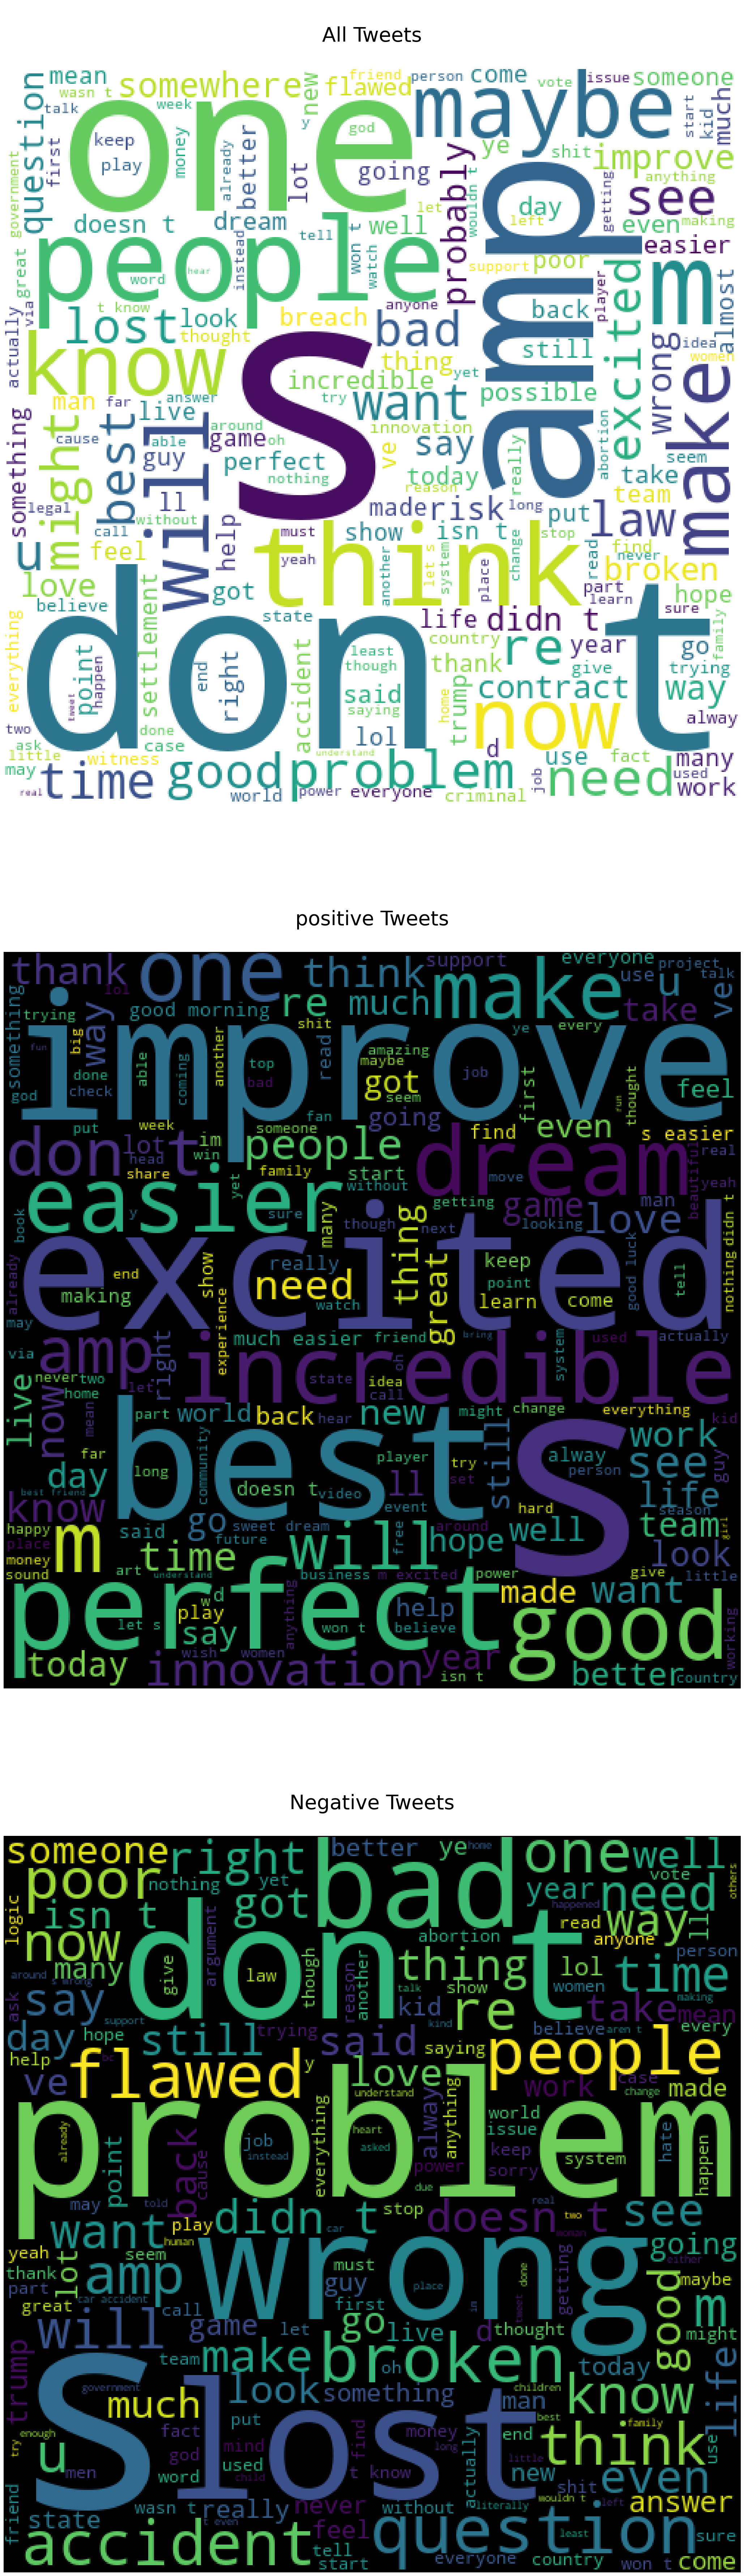

In [25]:
fig, ax = plt.subplots(3, 1, figsize  = (90,90))
firstcloud_all = WordCloud(
                          background_color='white',
                          width=500,
                          height=500
                         ).generate(" ".join(df['Clean']))
firstcloud_positive=WordCloud(
                          background_color='black',
                          width=500,
                          height=500
                         ).generate(" ".join(df[df['Label']=='positive']['Clean']))
firstcloud_negative=WordCloud(
                          background_color='black',
                          width=500,
                          height=500
                         ).generate(" ".join(df[df['Label']=='negative']['Clean']))

ax[0].imshow(firstcloud_all )
ax[0].set_title('\nAll Tweets\n', fontsize=40)
ax[0].axis('off')

ax[1].imshow(firstcloud_positive )
ax[1].set_title('\npositive Tweets\n', fontsize=40)
ax[1].axis('off')

ax[2].imshow(firstcloud_negative)
ax[2].set_title('\nNegative Tweets\n',fontsize=40)
ax[2].axis('off')

In [26]:
x = df["Clean"]
y = df["Label"]

In [27]:
model = Pipeline((("vect", TfidfVectorizer()),("clc", LogisticRegression(max_iter=600))))
xTrain = x.head(int(50000 * 0.9))
xTest =  x.tail(int(50000 * 0.1))
yTrain = y.head(int(50000*0.9))
yTest =  y.tail(int(50000 * 0.1))
model.fit(xTrain,yTrain)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clc', LogisticRegression(max_iter=600))])

In [28]:
accuracy = (acc(model.predict(xTest), yTest))*100
print("Accuracy :- ", accuracy)
yPrediction = model.predict(xTest)

Accuracy :-  95.58


In [29]:
print(model.predict(['Please improve standards @IRCTCofficial']))

['positive']


In [30]:
print(model.predict(['@BangtanHoe07 Had a lil accident nothing major tho just a lil sprain']))


['negative']


In [31]:
print(model.predict(['Should someone tell Trump that witness tampering is a crime? What about assault of a police officer? ðŸ˜³ðŸ¤¯#Trump #January6thCommitteeHearings #January6thCommiteeHearings'
]))

['litigious']


In [32]:
print(model.predict(['#thetastyworks @tastytrade #lizjny how about a DNTT trade in GOOGL ? sell the jan31st 1400/1425/1447.5/1450 jade lizard for 5.20. downside risk around 1420. If necessary, dont mind entering earnings week long at 1420']))


['uncertainty']
